# Tugas Pagerank

1. Buat graph berarah dengan networkx (minimal 9 node )
Hitung manual pagerank dari graph yang anda buat
Hitung menggunakan pagerank menggunakan networkx\
2. Implementasikan ulang  https://github.com/Shakunni/Extractive-Text-Summarization/blob/master/extractive_summarizer.ipynb
3. Upload di github repository webstatis masing masing
4.  Beri penjelasan terkait dengan proses

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## Pembuatan graph 9 node

In [ ]:
G = nx.DiGraph()
G.add_edges_from([(1,2),(1,3),(1,4),(2,3),(2,4),(3,1),(4,5),(4,6),(5,6),(5,7),(5,8),(6,8),(7,8), (7,9),(8,9), (9,5)])

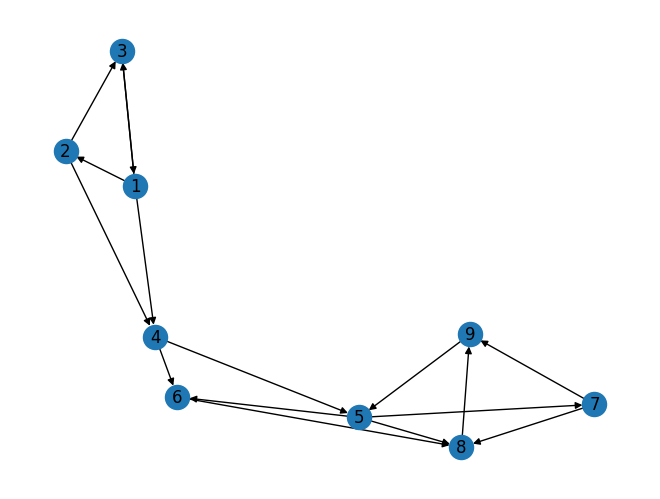

In [ ]:
nx.draw(G, with_labels=True)
plt.show()

### Membuat pagerank dengan manual

Pembuatan graph manual dengan menggunakan excel dengan rumus yang telah dinormalisasi

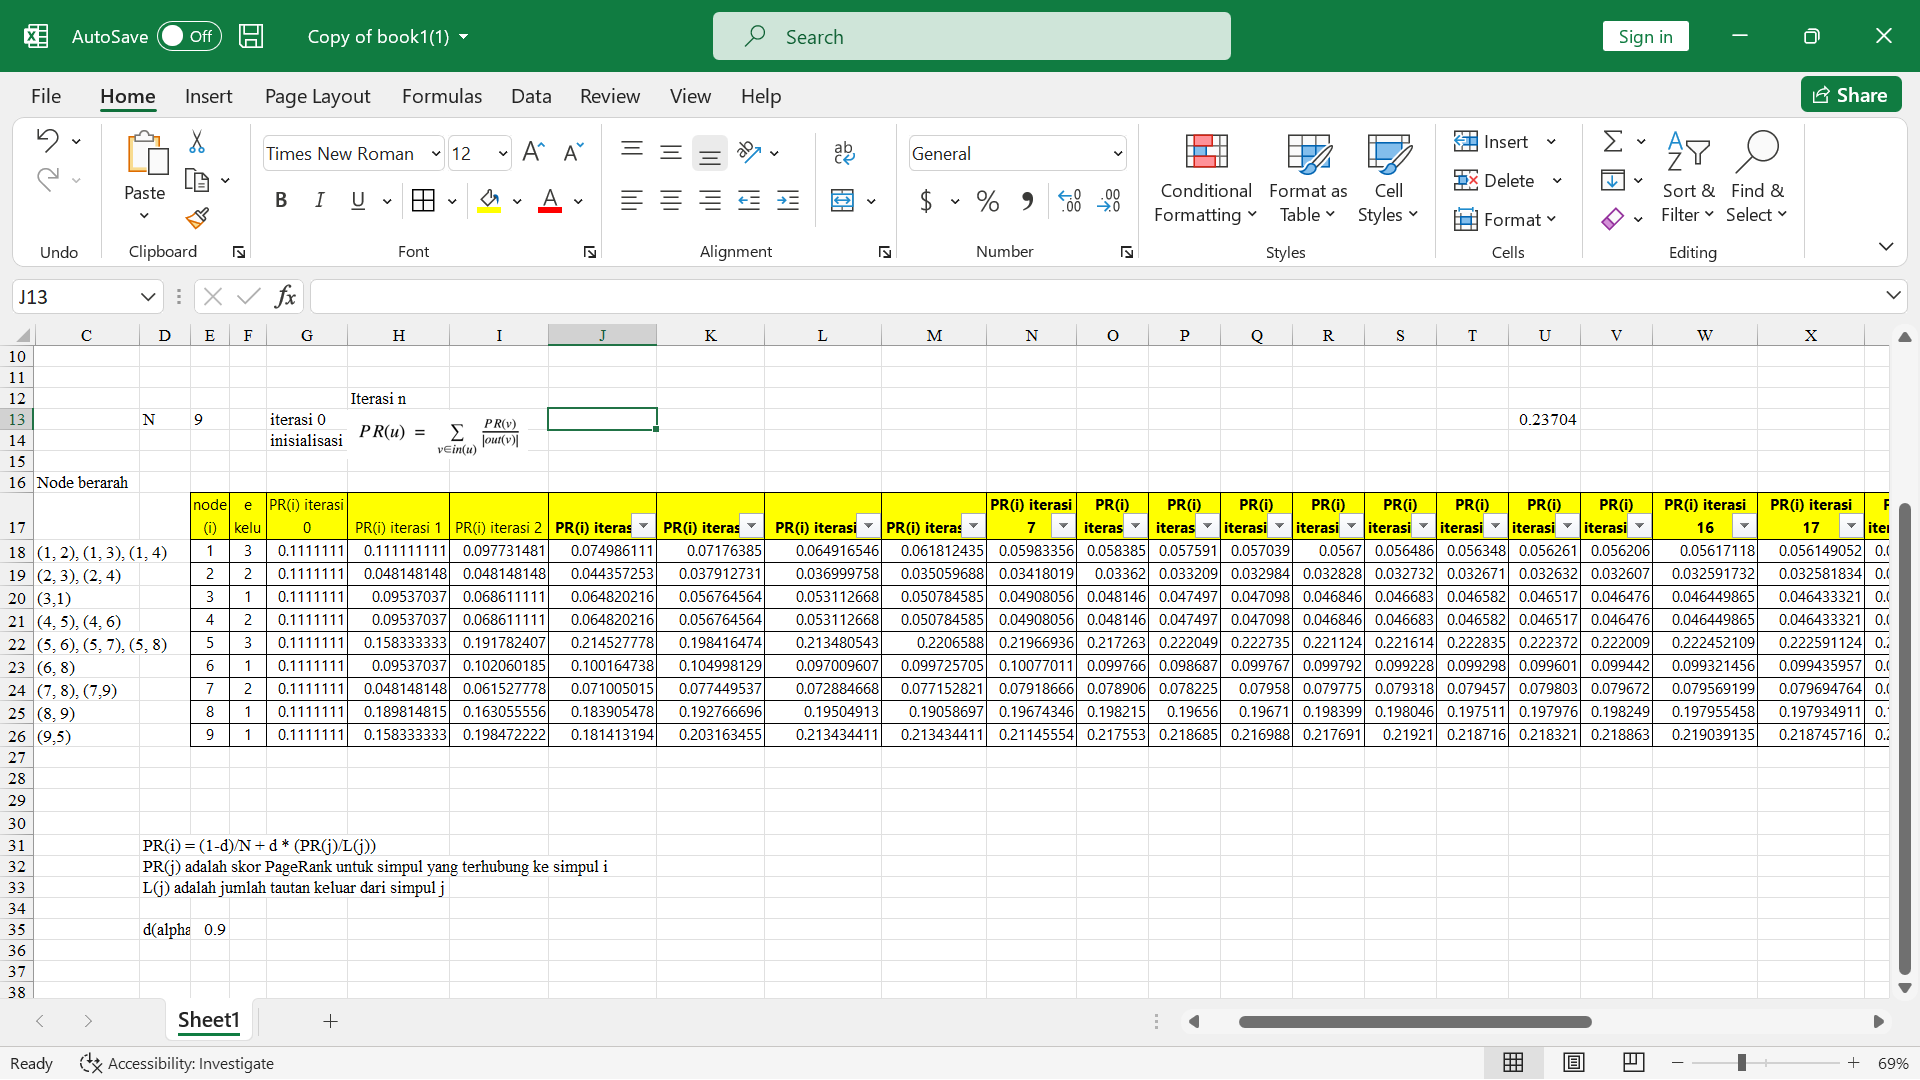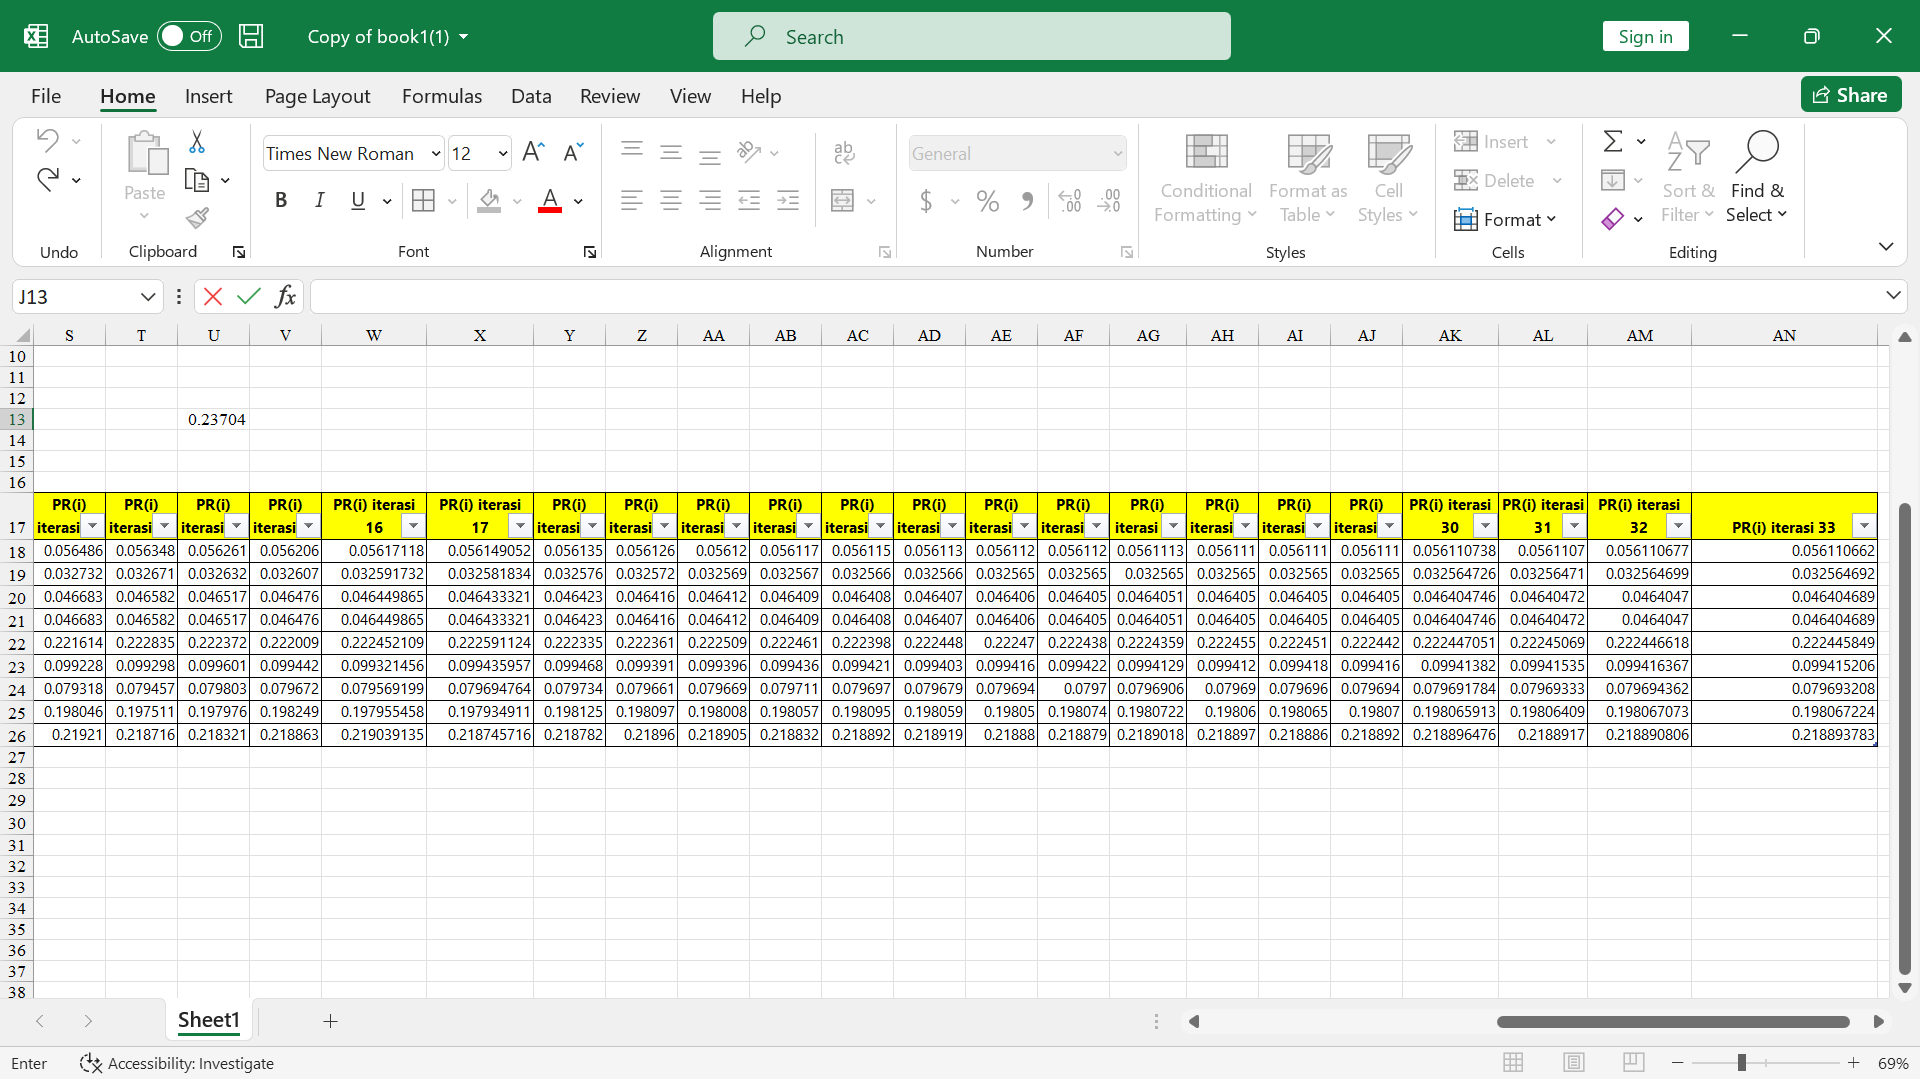

Hasil didapatkan pada iterasi ke-33

### Membuat pagerank dengan menggunakan networkx

In [ ]:
pagerank = nx.pagerank(G, alpha=0.85)
print(sum(pagerank.values()))

sorted(pagerank.items(), key=lambda x: x[0])

0.9999999999999998


[(1, 0.05611066163922548),
 (2, 0.03256469176407896),
 (3, 0.04640468864509743),
 (4, 0.04640468864509743),
 (5, 0.2224458489537223),
 (6, 0.09941520578677443),
 (7, 0.079693208300495),
 (8, 0.19806722372576466),
 (9, 0.21889378253974412)]

## Text Summarization

In [ ]:
!apt-get install python3-pypdf2
!pip install python-docx
!pip install docx
!pip install docx2txt

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  python3-pypdf2
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 49.4 kB of archives.
After this operation, 263 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 python3-pypdf2 all 1.26.0-3ubuntu1 [49.4 kB]
Fetched 49.4 kB in 2s (24.7 kB/s)
Selecting previously unselected package python3-pypdf2.
(Reading database ... 122349 files and directories currently installed.)
Preparing to unpack .../python3-pypdf2_1.26.0-3ubuntu1_all.deb ...
Unpacking python3-pypdf2 (1.26.0-3ubuntu1) ...
Setting up python3-pypdf2 (1.26.0-3ubuntu1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 70.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-

In [ ]:
import numpy as np
import PyPDF2
import docx2txt
import sys

import networkx as nx

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

### Fungsi read document

In [ ]:
def readDoc(name):

    # now read the type of document
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
        # print(name)
    # print(choice)
    # Case 1: if it is a .txt file
        
    if choice == 1:
        f = open(name, 'r', encoding="utf8")
        document = f.read()
        f.close()
            
    # Case 2: if it is a .pdf file
    elif choice == 2:
        pdfFileObj = open(name, 'rb', encoding="utf8")
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    # Case 3: none of the format
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    # print(type(document))
    return document

### Read document

In [ ]:
document = readDoc("docBerita.txt")


### Fungsi Tokenisasi

In [ ]:
from nltk.tokenize.punkt import PunktSentenceTokenizer

In [ ]:
def tokenize(document):
    # We are tokenizing using the PunktSentenceTokenizer
    # we call an instance of this class as sentence_tokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    
    # tokenize() method: takes our document as input and returns a list of all the sentences in the document
    
    # sentences is a list containing each sentence of the document as an element
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

In [ ]:
print('Panjang data dari file ini adalah:', end=' ')
print(len(document))

Panjang data dari file ini adalah: 2865


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [ ]:
sentences_list = tokenize(document)

# let us print the size of memory used by the list sentences
print('Ukuran list dalam Bytes: {}'.format(sys.getsizeof(sentences_list)))

# the size of one of the element of the list
print('Ukuran per item dalam Bytes: {}'.format(sys.getsizeof(sentences_list[0])))

Ukuran list dalam Bytes: 168
Ukuran per item dalam Bytes: 230


In [ ]:
for i in sentences_list:
    print(i)

Jakarta - Menteri Pendayagunaan Aparatur Negara dan Reformasi Birokrasi (PANRB) Abdullah Azwar Anas bertemu dengan Kepala Badan Pusat Statistik (BPS) Margo Yuwono, Rabu (22/2/2023).
Dalam pertemuan tersebut, keduanya membahas tentang kolaborasi manajemen data di BPS dengan evaluasi reformasi birokrasi tematik di Kementerian PANRB.Anas menjelaskan reformasi birokrasi akan difokuskan untuk mendukung sejumlah agenda prioritas pemerintah, sebagaimana yang diinstruksikan Presiden Joko Widodo.
Adapun fokus dari skema tematik tersebut di antaranya penurunan kemiskinan, peningkatan investasi, digitalisasi layanan, dan prioritas aktual Presiden berupa belanja produk dalam negeri dan pengendalian inflasi.
"Jadi nanti data dari BPS masuk ke sistem evaluasi reformasi birokrasi di Kementerian PANRB.
Sehingga kita bisa langsung tahu indikator hasil dari masing-masing pemerintah daerah.
Sekaligus ini semakin memasifkan pemahaman kita bersama bahwa reformasi birokrasi harus berdampak, di antaranya ke 

##Generate term-document matrix (TD matrix) dari data

In [ ]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [ ]:
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Bentuk dari matriks {}'.format(cv_matrix.get_shape))
print('Ukuran dari matriks: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names_out())
print(cv_matrix.toarray())

The data type of bow matrix <class 'scipy.sparse._csr.csr_matrix'>
Bentuk dari matriks <bound method spmatrix.get_shape of <14x211 sparse matrix of type '<class 'numpy.int64'>'
	with 354 stored elements in Compressed Sparse Row format>>
Ukuran dari matriks: 48
['2023' '22' '259' '27' 'abdullah' 'adapun' 'administratif' 'agar'
 'agenda' 'ai' 'ajak' 'akan' 'aktual' 'alhamdulillah' 'anas' 'antaranya'
 'aparatur' 'artificial' 'asal' 'asn' 'atur' 'azwar' 'baca' 'badan'
 'bahkan' 'bahwa' 'baik' 'bareng' 'belanja' 'berbagai' 'berbasis'
 'berdampak' 'bersama' 'bersifat' 'bertemu' 'bertugas' 'berupa' 'besar'
 'bidang' 'bikin' 'birokrasi' 'bisa' 'bps' 'daerah' 'dalam' 'dampak' 'dan'
 'dari' 'data' 'daya' 'dengan' 'di' 'didukung' 'difokuskan' 'digital'
 'digitalisasi' 'diinstruksikan' 'dikonsolidasikan' 'disederhanakan'
 'ditopang' 'duduk' 'dukungannya' 'ega' 'elemen' 'empat' 'evaluasi'
 'fokus' 'harapan' 'harapannya' 'harus' 'hasil' 'hasilnya' 'hilir' 'hulu'
 'imbuhnya' 'indikator' 'inflasi' 'in

In [ ]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.20724442 0.20724442 0.         ... 0.         0.         0.23944691]
 [0.         0.         0.         ... 0.         0.12588488 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.11587251 0.        ]
 [0.         0.         0.         ... 0.         0.08506786 0.        ]]


In [ ]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T

<bound method _cs_matrix.toarray of <211x14 sparse matrix of type '<class 'numpy.float64'>'
	with 354 stored elements in Compressed Sparse Column format>>


### Visualisasi data dalam bentuk graph

Number of edges 86
Number of vertices 14


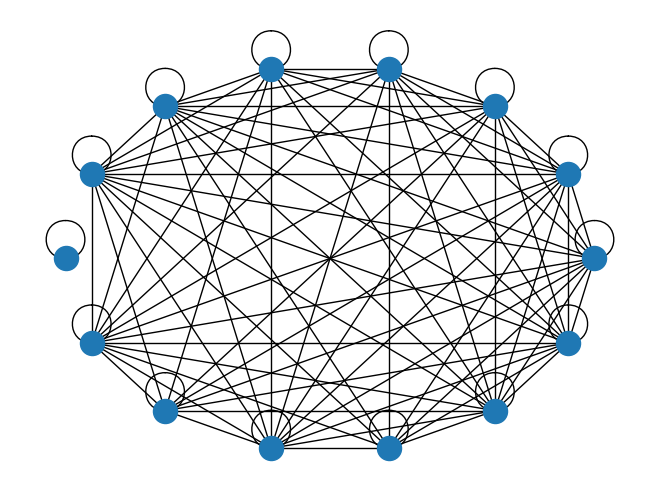

The memory used by the graph in Bytes is: 48


In [ ]:
nx_graph = nx.from_scipy_sparse_array(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

### Menentukan page rank pada setiap kalimat

In [ ]:
# ranks is a dictionary with key=node(sentences) and value=textrank (the rank of each of the sentences)
ranks = nx.pagerank(nx_graph)

# analyse the data type of ranks
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

# print the dictionary
for i in ranks:
    print(i, ranks[i])

<class 'dict'>
The size used by the dictionary in Bytes is: 640
0 0.0667247770049409
1 0.08371144582325854
2 0.07028173328201973
3 0.07668401375745929
4 0.058672420892655244
5 0.06870009287653431
6 0.06839284613496782
7 0.07142857142857142
8 0.07791981827359705
9 0.0645159683657745
10 0.07885016048018464
11 0.05917779310272871
12 0.07654383849769286
13 0.07839652007961492


### Menentukan kata yang dianggap penting dan generate summary

In [ ]:
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [ ]:
rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

In [ ]:
temp_array = []

# if all sentences have equal ranks, means they are all the same
# taking any sentence will give the summary, say the first sentence
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))

14


In [ ]:
threshold = (sum(temp_array) / len(temp_array)) + 0.2
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [ ]:
model = sentence_list

In [ ]:
# print(sentence_list)
summary = " ".join(str(x) for x in sentence_list)
print(summary)
# save the data in another file, names sum.txt
f = open('final3.txt', 'a+')
#print(type(f))
f.write('\n')
f.write(summary)
f.close

Dalam pertemuan tersebut, keduanya membahas tentang kolaborasi manajemen data di BPS dengan evaluasi reformasi birokrasi tematik di Kementerian PANRB.Anas menjelaskan reformasi birokrasi akan difokuskan untuk mendukung sejumlah agenda prioritas pemerintah, sebagaimana yang diinstruksikan Presiden Joko Widodo. "Penyederhanaan ini kita bikin dengan harapan nantinya semua elemen birokrasi fokus pada dampak, yaitu menyelesaikan masalah hilir di masyarakat seperti kemiskinan, stunting, investasi, belanja produk dalam negeri, dan sebagainya," paparnya.Anas pun menyampaikan dukungannya kepada BPS sebagai institusi pemerintah yang bertugas di bidang statistik. "Harapannya, berbagai data, berbagai sumber daya di BPS bisa dikonsolidasikan untuk mendukung reformasi birokrasi tematik," imbuhnya.Dalam kesempatan itu, Margo juga mempresentasikan berbagai progresivitas manajemen data di BPS yang telah ditopang dengan sistem digital terkini.Simak juga 'Kala MenPAN-RB Segera Atur ASN-PPPK Tak Bisa Asal

<function TextIOWrapper.close()>

### Menulis kembali kata penting yang sudah diringkas

In [ ]:
for lines in sentence_list:
    print(lines)

Dalam pertemuan tersebut, keduanya membahas tentang kolaborasi manajemen data di BPS dengan evaluasi reformasi birokrasi tematik di Kementerian PANRB.Anas menjelaskan reformasi birokrasi akan difokuskan untuk mendukung sejumlah agenda prioritas pemerintah, sebagaimana yang diinstruksikan Presiden Joko Widodo.
"Penyederhanaan ini kita bikin dengan harapan nantinya semua elemen birokrasi fokus pada dampak, yaitu menyelesaikan masalah hilir di masyarakat seperti kemiskinan, stunting, investasi, belanja produk dalam negeri, dan sebagainya," paparnya.Anas pun menyampaikan dukungannya kepada BPS sebagai institusi pemerintah yang bertugas di bidang statistik.
"Harapannya, berbagai data, berbagai sumber daya di BPS bisa dikonsolidasikan untuk mendukung reformasi birokrasi tematik," imbuhnya.Dalam kesempatan itu, Margo juga mempresentasikan berbagai progresivitas manajemen data di BPS yang telah ditopang dengan sistem digital terkini.Simak juga 'Kala MenPAN-RB Segera Atur ASN-PPPK Tak Bisa Asal